# Making a Hybrid Deep Learning Model

## Identify the Frauds with the Self_Organizing Map

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler()

X = sc.fit_transform(X)

### Training the SOM

In [6]:
from minisom import MiniSom

In [7]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 1.0)
som.random_weights_init(X)

In [8]:
som.train_random(data = X, num_iteration = 250)

### Visualising the results

In [9]:
from pylab import bone, pcolor, colorbar, plot, show

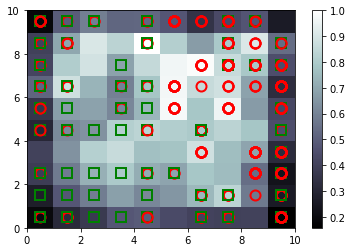

In [11]:
bone()
pcolor(som.distance_map().T)
# som.distance_map() will return MID (Mean Intermediate Distance) for all the winning nodes
# Transpose is taken to make the o/p in the right form for pcolor()

colorbar()
# colorbar() shows legend

markers = ['o', 's']
# "o" : circle (didn't get approval)
# "s" : square (got appproval)

colors = ["r", "g"]
# "r" : red
# "g" : green

for i, x in enumerate(X) :
    # i : indexes of all the customers
    # x : vectors of the customers at diff. iterations
    
    w = som.winner(x)
    # som.winner() gets the winning node
    
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = "None",
         markersize = 10,
         markeredgewidth = 2)
    # w[0] : x co-ordinate of winning node
    # w[1] : y co-ordinate of winning node
    # These are the co-ordinates of lower left of the square
    # We add 0.5 (+ 0.5), to get it to center

show()

### Finding the frauds

In [13]:
mappings = som.win_map(X)

In [14]:
frauds = np.concatenate((mappings[(5, 9)], mappings[(2, 9)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Going from Unsupervised to Supervised Deep Learning

### Creating the matrix of features

In [15]:
customers = dataset.iloc[:, 1:].values

### Creating the dependent variable

In [17]:
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)) :
    if dataset.iloc[i, 0] in frauds :
        is_fraud[i] = 1

In [18]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building the ANN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Initializing the ANN

In [27]:
classifier = models.Sequential()

#### Adding the input, hidden and output layers

In [29]:
# Input and hidden layer
classifier.add(Dense(units = 2, kernel_initializer = "uniform", activation = "relu", input_dim = 15))

# Output layer
classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))

#### Compiling the ANN

In [32]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Fitting the ANN to the Training set

In [36]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0794 - accuracy: 0.9710: 0s - loss: 0.0603 - 
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0765 - accuracy: 0.9710
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0750 - accuracy: 0.9710
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0734 - accuracy: 0.9710
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0723 - accuracy: 0.9710
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9710
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0704 - accuracy: 0.9710
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9710
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9710
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0

In [38]:
classifier.save("classifier_model_supervised.h5")

### Predicting the probabilities of frauds

In [40]:
y_pred = classifier.predict(customers)

# Adding customer_id
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [42]:
# Sorting the y_pred
y_pred = y_pred[y_pred[:, 1].argsort()]

# argsort() will sort all the probabilities based on the prediction